In [1]:
%matplotlib inline
import numpy as np

In [7]:
import utils; #reload(utils)
from utils import *
from __future__ import division, print_function

In [8]:
batch_size=64

In [9]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
#Need to insert a dimension for keras to work properly
X_test = np.expand_dims(X_test,1)
X_train = np.expand_dims(X_train,1)


In [53]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [25]:
np.shape(X_train)

(60000, 1, 28, 28)

In [26]:
np.shape(X_test)

(10000, 1, 28, 28)

In [12]:
y_train[:5] 

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
# need to one-hot encode y_train and y_test
y_train = onehot(y_train)
y_test = onehot(y_test)

In [27]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [29]:
np.shape(y_train)

(60000, 10)

In [43]:
np.shape(y_test)

(10000, 10)

In [52]:
X_test.dtype

dtype('uint8')

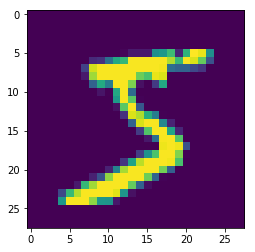

In [42]:
plt.imshow(X_train[0,0,:,:])

In [15]:
mean_px = np.mean(X_train,axis=0)
std_px = np.std(X_train,axis=0)

In [19]:
np.shape(std_px)

(1, 28, 28)

In [20]:
def norm_input(x): return (x-mean_px)/std_px

In [21]:
lm = Sequential()
lm.add(Lambda(norm_input, input_shape=(1,28,28)))
lm.add(Flatten())
lm.add(Dense(10,activation='softmax'))

/Users/davidbressler/anaconda/lib/python3.6/site-packages/keras/layers/core.py:630: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1, 28, 28)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [22]:
lm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 28, 28)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
lm.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)
test_batches = gen.flow(X_test, y_test, batch_size=64)

In [55]:
lm.fit_generator(batches, nb_epoch=1, 
                    validation_data=test_batches)

/Users/davidbressler/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/Users/davidbressler/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., epochs=1)`
  from ipykernel import kernelapp as app


TypeError: ('An update must have the same type as the original shared variable (shared_var=training/training/Adam/variable, shared_var.type=TensorType(float32, matrix), update_val=Elemwise{add,no_inplace}.0, update_val.type=TensorType(float64, matrix)).', 'If the difference is related to the broadcast pattern, you can call the tensor.unbroadcast(var, axis_to_unbroadcast[, ...]) function to remove broadcastable dimensions.')

In [57]:
lm.fit(batches, test_batches, epochs=1)

TypeError: Error when checking model input: data should be a Numpy array, or list/dict of Numpy arrays. Found: <keras.preprocessing.image.NumpyArrayIterator object at 0x12309d7b8>...

In [59]:
lm.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

/Users/davidbressler/anaconda/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


TypeError: ('An update must have the same type as the original shared variable (shared_var=training/training/training/Adam/variable, shared_var.type=TensorType(float32, matrix), update_val=Elemwise{add,no_inplace}.0, update_val.type=TensorType(float64, matrix)).', 'If the difference is related to the broadcast pattern, you can call the tensor.unbroadcast(var, axis_to_unbroadcast[, ...]) function to remove broadcastable dimensions.')